# Transfer Learning with VGG19

## Import Libraries

In [9]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Flatten

## Data Preprocessing

In [10]:
train_data_dir = 'Dataset/train & validation'

### Preview Data

In [11]:
# print("Sample day image:")
# plt.imshow(load_img(f"{os.path.join(day_dir, os.listdir(day_dir)[0])}"))
# plt.show()

# print("\nSample night image:")
# plt.imshow(load_img(f"{os.path.join(night_dir, os.listdir(night_dir)[0])}"))
# plt.show()

### Image Augmentation

In [12]:
IMAGE_SIZE = 150
BATCH_SIZE = 32

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                #    rotation_range=40,
                                #    width_shift_range=0.2,
                                #    height_shift_range=0.2,
                                #    shear_range=0.2,
                                #    zoom_range=0.2,
                                #    horizontal_flip=True,
                                #    fill_mode='nearest'
                                validation_split=0.2)

In [14]:
# Set up the data generator for training and validation
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='categorical',
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory(train_data_dir,
                                                         target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                         batch_size=BATCH_SIZE,
                                                         class_mode='categorical',
                                                         subset='validation')

Found 1037 images belonging to 5 classes.
Found 258 images belonging to 5 classes.


## Modelling

### Pre-Trained Model Load

In [15]:
# Load the pre-trained VGG19 model
vgg19 = tf.keras.applications.VGG19(weights='imagenet',
                                    include_top=False,
                                    input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# Freeze the weights of the pre-trained layers
for layer in vgg19.layers:
    vgg19.trainable = False

### Fine Tuning

In [16]:
# Add your custom layers on top of the pre-trained model
model = Sequential([
    vgg19,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(5, activation='softmax'),
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Look at model arshitecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 22,123,077
Trainable params: 2,098,693
Non-trainable params: 20,024,384
_________________________________________________________________


In [17]:
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator)

Epoch 1/10
33/33 [==============================] - 56s 2s/step - loss: 1.0929 - accuracy: 0.6393 - val_loss: 0.6312 - val_accuracy: 0.7287
Epoch 2/10
33/33 [==============================] - 54s 2s/step - loss: 0.3224 - accuracy: 0.8824 - val_loss: 0.5203 - val_accuracy: 0.7946
Epoch 3/10
33/33 [==============================] - 54s 2s/step - loss: 0.1958 - accuracy: 0.9441 - val_loss: 0.5127 - val_accuracy: 0.7829
Epoch 4/10
33/33 [==============================] - 54s 2s/step - loss: 0.0961 - accuracy: 0.9855 - val_loss: 0.5405 - val_accuracy: 0.7946
Epoch 5/10
33/33 [==============================] - 58s 2s/step - loss: 0.0628 - accuracy: 0.9942 - val_loss: 0.5509 - val_accuracy: 0.7829
Epoch 6/10
33/33 [==============================] - 54s 2s/step - loss: 0.0455 - accuracy: 0.9971 - val_loss: 0.5527 - val_accuracy: 0.8023
Epoch 7/10
33/33 [==============================] - 55s 2s/step - loss: 0.0306 - accuracy: 1.0000 - val_loss: 0.6166 - val_accuracy: 0.8062
Epoch 8/10
33/33 [==

## Model Evaluation

In [18]:
def plot_graghs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel('Epochs')
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

### Accuracy

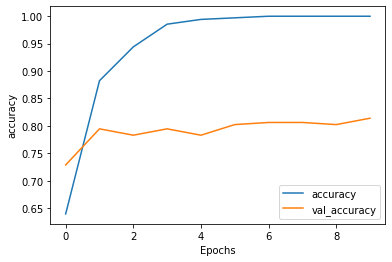

In [19]:
plot_graghs(history, 'accuracy')

### Loss

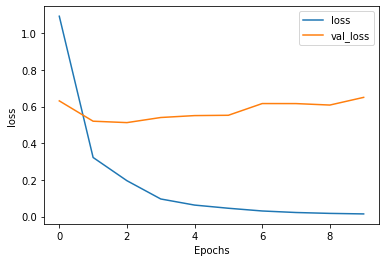

In [20]:
plot_graghs(history, 'loss')

## Model Predictions

In [23]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

label = ['Keyboard', 'Laptop', 'Monitor', 'Mouse', 'Phone']
for fn in os.listdir('Dataset/test'):
  path = './Dataset/test/' + fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  for i, l in zip(classes[0], label):
    print("{} : {:.2%}".format(l, i))

1/1 [==============================] - 0s 67ms/step
keyboard.jpg
Keyboard : 85.96%
Laptop : 1.50%
Monitor : 0.00%
Mouse : 0.05%
Phone : 12.48%
1/1 [==============================] - 0s 91ms/step
laptop_0,5_mati.jpg
Keyboard : 0.10%
Laptop : 98.18%
Monitor : 1.64%
Mouse : 0.05%
Phone : 0.02%
1/1 [==============================] - 0s 87ms/step
laptop_hidup.jpg
Keyboard : 0.02%
Laptop : 99.47%
Monitor : 0.42%
Mouse : 0.01%
Phone : 0.09%
1/1 [==============================] - 0s 76ms/step
laptop_mati.jpg
Keyboard : 0.10%
Laptop : 96.34%
Monitor : 3.49%
Mouse : 0.07%
Phone : 0.01%
1/1 [==============================] - 0s 81ms/step
monitor_hidup.jpg
Keyboard : 23.96%
Laptop : 75.69%
Monitor : 0.04%
Mouse : 0.00%
Phone : 0.31%
1/1 [==============================] - 0s 80ms/step
monitor_mati.jpg
Keyboard : 0.04%
Laptop : 2.00%
Monitor : 97.92%
Mouse : 0.03%
Phone : 0.01%
1/1 [==============================] - 0s 81ms/step
mouse.jpg
Keyboard : 0.01%
Laptop : 0.02%
Monitor : 0.07%
Mouse : 99.85

## Save the Model

In [22]:
# Save the model
# model.save('e_waste_classifier.h5')